In [ ]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt

points = np.load('/home/admina/segmetation/DLOSeg/src/FoundationStereo/output/point_cloud.npy')
points_flat = points.reshape(-1, 3)

In [81]:
# Parametric spline fitting

tck, u = splprep(points_flat.T, s=1.0, per=False)

ValueError: Invalid inputs.

-1.015112042427063

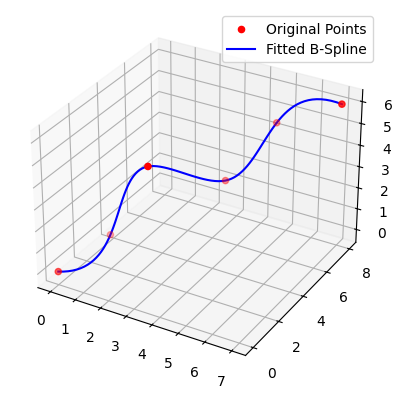

In [60]:
points = np.array([
    [0, 0, 0],
    [1, 2, 1],
    [2, 3, 4],
    [4, 5, 3],
    [5, 7, 5],
    [7, 8, 6]
])

# Extract x, y, z coordinates
x, y, z = points[:, 0], points[:, 1], points[:, 2]
# s: smoothing factor (adjustable), k: spline degree
tck, u = splprep([x, y, z], s=0, k=3)  # s=0 means spline will go through all points exactly

# Evaluate spline at 100 evenly spaced points from 0 to 1
u_new = np.linspace(0, 1, 100)
x_new, y_new, z_new = splev(u_new, tck)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot original points
ax.scatter(x, y, z, color='red', label='Original Points')

# Plot spline
ax.plot(x_new, y_new, z_new, color='blue', label='Fitted B-Spline')

ax.legend()
plt.show()


In [61]:
x

array([0, 1, 2, 4, 5, 7])

In [47]:
points.shape


(6, 3)

0

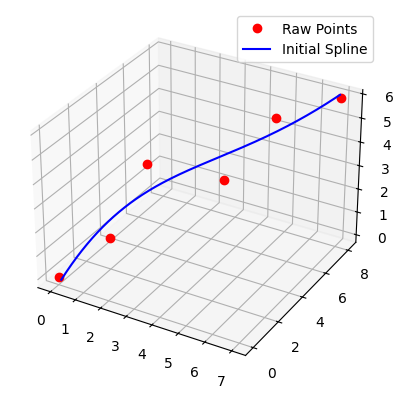

In [40]:
# Parametric spline fitting
# tck, u = splprep(, s=1.0, per=False)
unew = np.linspace(0, 1, 1000)
xnew, ynew, znew = splev(unew, tck)

# Plot to visualize initial guess
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(points[:,0], points[:,1], points[:,2], 'ro', label='Raw Points')
ax.plot(xnew, ynew, znew, 'b-', label='Initial Spline')
ax.legend()
plt.show()

In [4]:
from scipy.optimize import minimize

# Define discrete bending energy
def bending_energy(x):
    x = x.reshape(-1, 3)
    energy = 0.0
    for i in range(1, len(x)-1):
        e1 = x[i] - x[i-1]
        e2 = x[i+1] - x[i]
        angle = np.arccos(np.clip(np.dot(e1, e2) / (np.linalg.norm(e1) * np.linalg.norm(e2)), -1.0, 1.0))
        energy += angle**2 / np.linalg.norm(e1)  # simplified bending energy
    return energy

# Initial guess (flattened)
initial_guess = np.vstack([xnew, ynew, znew]).T.flatten()

# Optimization
result = minimize(bending_energy, initial_guess, method='L-BFGS-B', options={'maxiter': 1000})
optimized_curve = result.x.reshape(-1,3)

NameError: name 'xnew' is not defined

In [ ]:
# Visualize optimized curve
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(points[:,0], points[:,1], points[:,2], 'ro', label='Raw Points')
ax.plot(xnew, ynew, znew, 'b-', label='Initial Guess')
ax.plot(optimized_curve[:,0], optimized_curve[:,1], optimized_curve[:,2], 'g-', label='Optimized Curve')
ax.legend()
plt.show()